## Practical Work 2

For this practical work, the student will have to develop a Python program that is able to implement the gradient descent variants (Batch/Mini-Batch/Stochastic) in order to achieve the linear regression of a set of datapoints.

#### Import numpy, matplotlib.pyplot and make it inline

In [1]:
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline

To have a dataset or set of data points, the student must generate a pair of arrays <b>X</b> and <b>y</b> with the values in <b>X</b> equally distributed between <b>0</b> and <b>20</b> and the values in <b>y</b> such that: 
<b>yi = a*xi + b (and a = -2, b = 1)</b>


In [2]:
x=np.linspace(0,20, 50)

In [3]:
y=-2*x+1
print(y)

[  1.           0.18367347  -0.63265306  -1.44897959  -2.26530612
  -3.08163265  -3.89795918  -4.71428571  -5.53061224  -6.34693878
  -7.16326531  -7.97959184  -8.79591837  -9.6122449  -10.42857143
 -11.24489796 -12.06122449 -12.87755102 -13.69387755 -14.51020408
 -15.32653061 -16.14285714 -16.95918367 -17.7755102  -18.59183673
 -19.40816327 -20.2244898  -21.04081633 -21.85714286 -22.67346939
 -23.48979592 -24.30612245 -25.12244898 -25.93877551 -26.75510204
 -27.57142857 -28.3877551  -29.20408163 -30.02040816 -30.83673469
 -31.65306122 -32.46938776 -33.28571429 -34.10204082 -34.91836735
 -35.73469388 -36.55102041 -37.36734694 -38.18367347 -39.        ]


#### Use your code from practical session 1 and create a function to perform GD for single variable linear regression.
#### The function should take the following input parameters:
##### Input data (X), Target Labels (y), Learning Rate (alpha), Maximum number of iterations
#### The function should return the following:
##### All Theta_0 and Theta_1 values till converge, and equivellant Losses, all hypothesis output, and optimum values of Theta_0 and Theta_1
#### Note: you can choose any suitable stop criteria.

In [4]:
def batch_gd(x,y,alpha,max_iterations):
    h_lst=[]
    theta0=0
    theta1=0
    theta0lst=[]
    theta1lst=[]
    no_of_iterations=[]
    cost=[]
    iteration=0
    for i in range(max_iterations):
        h= theta0 + theta1 * x
        m=len(x)
        j=(1/(2*m)*(sum((h-y)**2)))
        grad0=(1/m)*sum((h-y))
        grad1=(1/m)*sum(x*(h-y))
        theta0=theta0-(alpha*grad0)
        theta1=theta1-(alpha*grad1)
        theta0lst.append(theta0)
        theta1lst.append(theta1)
        iteration=iteration+1
        cost.append(j)
        h_lst.append(h)
        no_of_iterations.append(iteration)
        try :
            cond=abs(np.linalg.norm([theta0,theta1])-np.linalg.norm([theta0lst[-2],theta1lst[-2]]))
            if cond < 0.0001:
                break
        except (IndexError) :
            pass
    return ( cost ,h ,theta0lst,theta1lst ,theta0,theta1, no_of_iterations ,h_lst)


#### Try your function with any input parameterss of your choice.

In [5]:
batch_gd(x,y,0.001,1000)

([249.88775510204084,
  186.82544901821944,
  139.68837516021625,
  104.45490187382671,
  78.11898842228952,
  58.43371572199668,
  43.71958378928336,
  32.72122022747044,
  24.50027441454269,
  18.355359342017692,
  13.762210705990901,
  10.328957746061088,
  7.762689631346796,
  5.844464905842495,
  4.410631849965184,
  3.338866049639045,
  2.5377339267913546,
  1.9388918129686956,
  1.4912550069458363,
  1.156639332215653,
  0.9065033409350507,
  0.7195132158124088,
  0.5797226123323644,
  0.47521214916916626,
  0.3970724708856112,
  0.33864411990131277,
  0.29494936515702347,
  0.26226751225555917,
  0.23781746140676596,
  0.21952042966789262,
  0.2058225934248728,
  0.1955625193327805,
  0.18787207319369542,
  0.1821023525195568,
  0.1777683234973333,
  0.1745074388953092,
  0.17204870627464974,
  0.17018956746915465,
  0.16877861673756953,
  0.16770268313644945,
  0.16687717500799543,
  0.1662388627942387,
  0.16574048442201467,
  0.16534671300117215,
  0.1650311428082448,
  0.16

#### Calculate r2 score

In [6]:
from sklearn.metrics import r2_score

In [7]:
cost ,h ,theta0lst,theta1lst ,theta0,theta1, no_of_iterations,h_lst  = batch_gd(x,y,0.001,100)


In [8]:
r2 = r2_score(y, h)
print(r2)

0.9976443888155676


#### Plot loss vs. epochs

<function matplotlib.pyplot.show(close=None, block=None)>

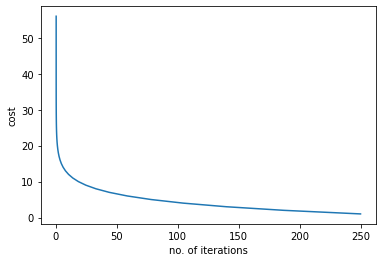

In [9]:
plt.plot(cost,no_of_iterations)
plt.xlabel('no. of iterations')
plt.ylabel('cost')
plt.show

#### Plot Theta_0 vs. loss and Theta_1 vs. loss

<function matplotlib.pyplot.show(close=None, block=None)>

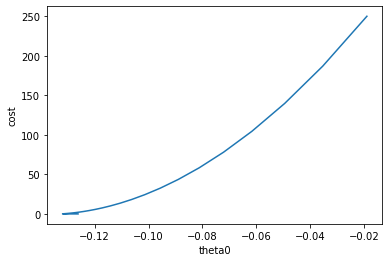

In [10]:
plt.plot(theta0lst,cost)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

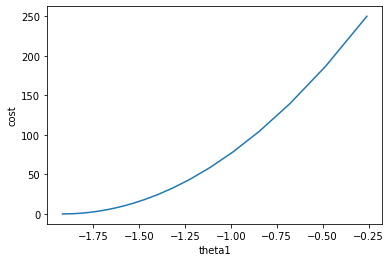

In [11]:
plt.plot(theta1lst,cost)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.show

#### Plot all regression lines till converge

<function matplotlib.pyplot.show(close=None, block=None)>

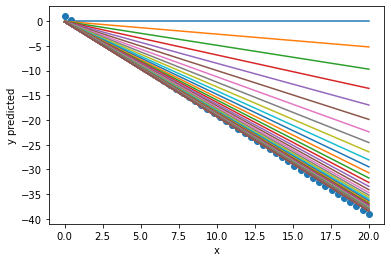

In [12]:
plt.scatter(x,y)
for h in h_lst:
    plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show

#### Plot the best regression line

<function matplotlib.pyplot.show(close=None, block=None)>

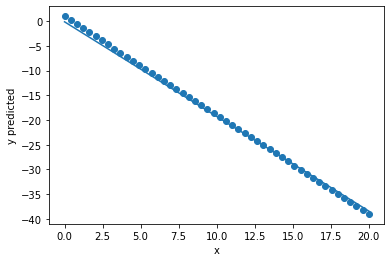

In [13]:
plt.scatter(x,y)
plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show

#### Try different learning rate and number of iterations then plot loss vs. epochs, loss vs. Theat_0 and Theta_1
#### all regression lines till converge, and the best regression line
#### and see the difference in output.

In [15]:
cost ,h ,theta0lst,theta1lst ,theta0,theta1, no_of_iterations,h_lst  = batch_gd(x,y,0.0001,1000)

<function matplotlib.pyplot.show(close=None, block=None)>

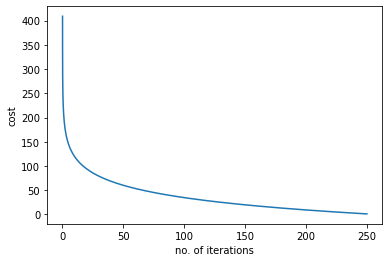

In [16]:
plt.plot(cost,no_of_iterations)
plt.xlabel('no. of iterations')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

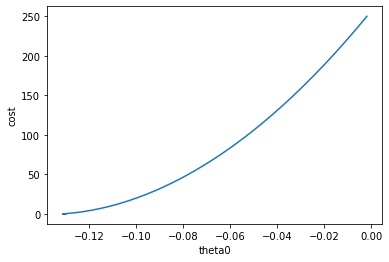

In [17]:
plt.plot(theta0lst,cost)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

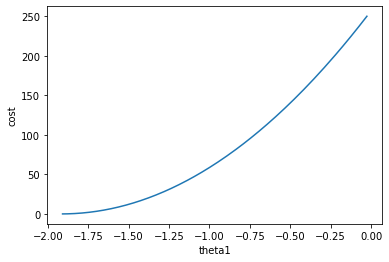

In [18]:
plt.plot(theta1lst,cost)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

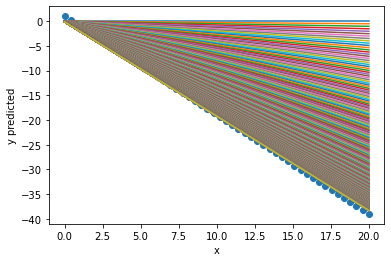

In [19]:
plt.scatter(x,y)
for h in h_lst:
    plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

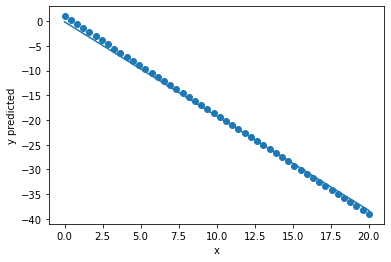

In [20]:
plt.scatter(x,y)
plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show

#### Update the implementation of the Batch GD to be Mini-Batch and rpeat the above plots and evaluations
#### Change batch size and see the effect

In [21]:
x=np.linspace(0,20, 50)
y=-2*x+1


def mini_batch_gradient(batch_size,x,y,alpha,max_epochs):
    h_lst=[]
    theta0=0
    theta1=0
    theta0lst=[]
    theta1lst=[]
    #no_of_iterations=[]
    cost=[]
    #iteration=0
    for k in range(max_epochs):
        h1=theta0+theta1*x
        for i in range(0, x.shape[0], batch_size):
            x_mini = x[i:i + batch_size]
            y_mini = y[i:i + batch_size]
    
            h= theta0 + theta1 *x_mini
            m=len(x_mini)
            j=(1/(2*m)*(sum((h-y_mini)**2)))
    
            grad0=(1/m)*sum((h-y_mini))
            grad1=(1/m)*sum(x_mini*(h-y_mini))
    
            theta0=theta0-(alpha*grad0)
            theta1=theta1-(alpha*grad1)
    
            theta0lst.append(theta0)
            theta1lst.append(theta1)
            
            cost.append(j)
        h_lst.append(h1)
        try :
            cond=abs(np.linalg.norm([theta0,theta1])-np.linalg.norm([theta0lst[-2],theta1lst[-2]]))
            if cond < 0.0001:
                break
        except (IndexError) :
            pass
            
    return ( cost ,h ,theta0lst,theta1lst ,theta0,theta1 ,h_lst)

In [22]:
cost ,h ,theta0lst,theta1lst ,theta0,theta1 ,h_lst = mini_batch_gradient(10,x,y,0.0001,100)

In [23]:
y_ped = theta0 + theta1 * x


In [24]:
r2 = r2_score(y, y_ped)
print(r2)

0.9976345294912842


<function matplotlib.pyplot.show(close=None, block=None)>

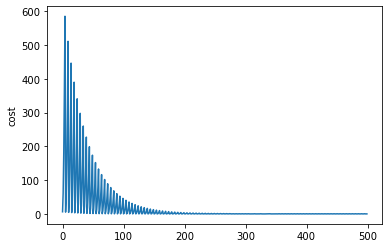

In [25]:
plt.plot(cost)
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

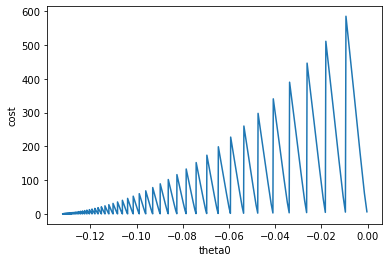

In [26]:
plt.plot(theta0lst,cost)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

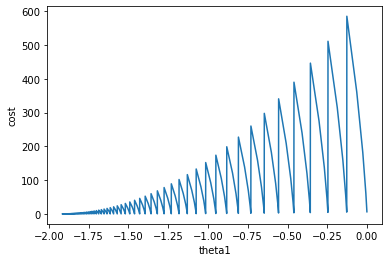

In [27]:
plt.plot(theta1lst,cost)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

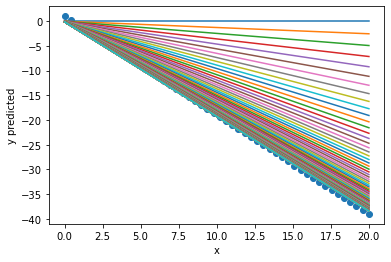

In [28]:
plt.scatter(x,y)
for h in h_lst:
    plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

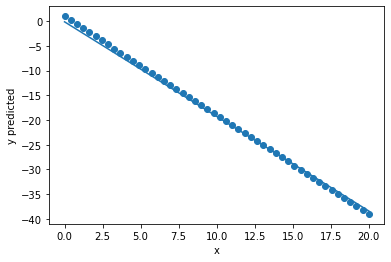

In [29]:
plt.scatter(x,y)
plt.plot(x,y_ped)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show

In [30]:
#trying with different batch size
cost ,h ,theta0lst,theta1lst ,theta0,theta1 ,h_lst = mini_batch_gradient(5,x,y,0.0001,1000)

<function matplotlib.pyplot.show(close=None, block=None)>

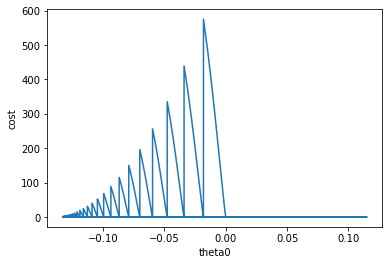

In [31]:
plt.plot(theta0lst,cost)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

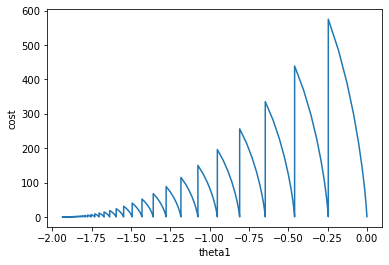

In [32]:
plt.plot(theta1lst,cost)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

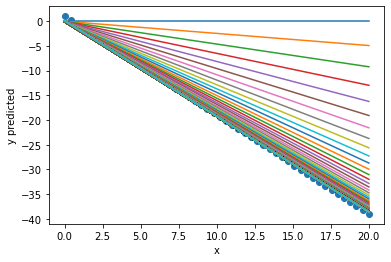

In [33]:
plt.scatter(x,y)
for h in h_lst:
    plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

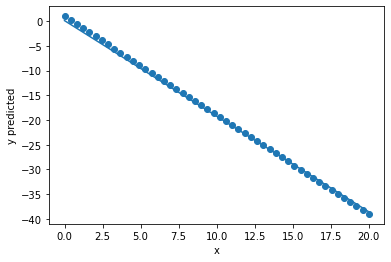

In [34]:
plt.scatter(x,y)
plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show

## Stochastic GD

#### Update the implementation of the Batch GD to beStochastic and rpeat the above plots and evaluations
#### You can try different learning rate and see its effect.
#### Compare to Batch and Mini-Batch GD

In [35]:
#for stochastic gradient we will use the same function as mini batch but we will make the batch size 1
def stochastic_gradient(batch_size,x,y,alpha,max_epochs):
    h_lst=[]
    theta0=0
    theta1=0
    theta0lst=[]
    theta1lst=[]
    cost=[]
    for k in range(max_epochs):
        h_= theta0 + theta1 *x
        for i in range(0, x.shape[0], batch_size):
            x_mini = x[i:i + batch_size]
            y_mini = y[i:i + batch_size]
    
            h= theta0 + theta1 *x_mini
            m=len(x_mini)
            j=(1/(2*m)*(sum((h-y_mini)**2)))
    
            grad0=(1/m)*sum((h-y_mini))
            grad1=(1/m)*sum(x_mini*(h-y_mini))
    
            theta0=theta0-(alpha*grad0)
            theta1=theta1-(alpha*grad1)
    
            theta0lst.append(theta0)
            theta1lst.append(theta1)
            
            cost.append(j)
        h_lst.append(h_)
        try :
            cond=abs(np.linalg.norm([theta0,theta1])-np.linalg.norm([theta0lst[-2],theta1lst[-2]]))
            if cond < 0.0001:
                break
        except (IndexError) :
            pass
            
    return ( cost ,h ,theta0lst,theta1lst ,theta0,theta1 ,h_lst)

In [36]:
cost ,h ,theta0lst,theta1lst ,theta0,theta1 ,h_lst=stochastic_gradient(1,x,y,0.0001,100)


<function matplotlib.pyplot.show(close=None, block=None)>

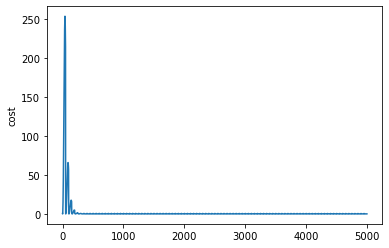

In [37]:
plt.plot(cost)
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

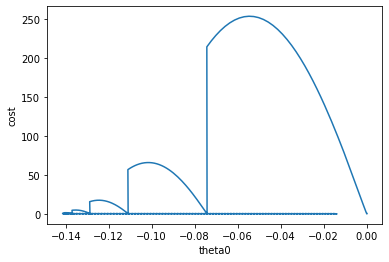

In [38]:
plt.plot(theta0lst,cost)
plt.xlabel('theta0')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

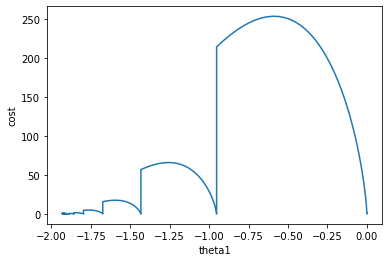

In [39]:
plt.plot(theta1lst,cost)
plt.xlabel('theta1')
plt.ylabel('cost')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

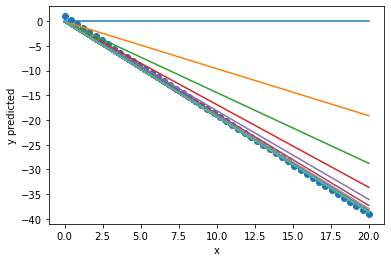

In [40]:
plt.scatter(x,y)
for h in h_lst:
    plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

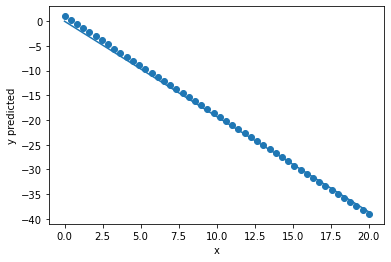

In [41]:

plt.scatter(x,y)
plt.plot(x,h)
plt.xlabel('x')
plt.ylabel('y predicted')
plt.show
